# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

import matplotlib.pyplot as plt

### Now take a look at the shapes of the X and y matricies 

In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [4]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

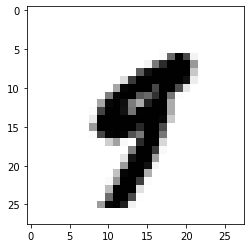

In [5]:
plt.imshow(X[36000].reshape(28,28) , cmap = plt.cm.binary, interpolation="nearest")


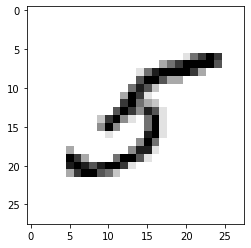

In [10]:
plt.imshow(X[35].reshape(28,28) , cmap = plt.cm.binary, interpolation="nearest")


### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [25]:
y[36000]

'9'

In [11]:
y[35]

'5'

Yes, we can say that the plot shows a 9 and the outcome also shows a 9.

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [13]:
X_train = X[:60000] 
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [14]:
# We want to create a new variable that tells us whether there is  5 or not, in order to classify that there is 
# a 5 or not
y5 = np.array(list(map(lambda y:1 if y=='5' else 0, y)))

#less_than_zero = list(filter(lambda x: x < 0, number_list))

In [15]:
# Checking the type of y5, to check that is an array
type(y5)

numpy.ndarray

In [16]:
# Checking the shape of the array to see that we have all the elements 
y5.shape

(70000,)

In [17]:
# Splitting our new target vector y5 into train and test. 
y5_train = y5[:60000]
y5_test = y5[60000:]

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [30]:
# Importing the library for a logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [31]:
# Creating an instance for the logistic regression 
logreg = LogisticRegression()

# Fitting the logistic regression with X_train and y5_train
logreg.fit(X_train, y5_train)
logreg.predict(X_test)

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 0, 1, 0])

### Does the classifier predict correctly the 36000th digit we picked before?

In [32]:
# Since the 36000th digit is on the train test, we predict all the values, not only the test set,
# in order to see if the value predicted is a 5 or not. 
y5_pred = logreg.predict(X)

In [33]:
y5_pred[36000]

0

In [34]:
y5_pred[35]

1

In [36]:
y5_pred= logreg.predict(X_test)

Yes, it predicted 0 and 0 is that the number is **not** a five, since it is a 9. 

When we predict y[35] that is actually a 5, we say that the outcome is a 1 and it means that it is a five. 

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [37]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [38]:
never_5_clf.fit(X_train, y_train)
y_never_5_pred = never_5_clf.predict(X_test)

In [39]:
y_never_5_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [40]:
y_never_5_pred= y_never_5_pred[:,0]
y_never_5_pred = np.where( y_never_5_pred == True, 1, 0) 

# We can do it with flatten 
# y_never_5_pred = y_never_5_pred.flatten()

In [41]:
y_never_5_pred

array([0, 0, 0, ..., 0, 0, 0])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [50]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

# Logistic regression
print(f"Confusion matrix = \n {confusion_matrix(y5_test, y5_pred)}")
print(f"precision score = {precision_score(y5_test, y5_pred)}")
print(f"recall = {recall_score(y5_test, y5_pred)}")
print(f"f1 score = {f1_score(y5_test, y5_pred)}")
print(f"accuracy = {accuracy_score(y5_test, y5_pred)}")

Confusion matrix = 
 [[9026   82]
 [ 145  747]]
precision score = 0.9010856453558505
recall = 0.8374439461883408
f1 score = 0.8680999418942476
accuracy = 0.9773


In [51]:
# Never5 classifier
print(f"Confusion matrix = \n {confusion_matrix(y5_test, y_never_5_pred)}")
print(f"precision score = {precision_score(y5_test, y_never_5_pred)}")
print(f"recall = {recall_score(y5_test, y_never_5_pred)}")
print(f"f1 score = {f1_score(y5_test, y_never_5_pred)}")
print(f"accuracy = {accuracy_score(y5_test, y_never_5_pred)}")

Confusion matrix = 
 [[9108    0]
 [ 892    0]]
precision score = 0.0
recall = 0.0
f1 score = 0.0
accuracy = 0.9108


/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

What we can see from the confusion matrix below, is that even if never_5 always predicts a 0, since our objective was to say if it was a 5 or not, then there are much more probabilities to not predict a 5 than predicting it. Therefore, the accuracy is quite high in this case. 

This is why we cannot only take a look at the accuracy, and that we should take a look at all the scores. We can see from the other scores that in the logistic regression the model performs quite well according to all the scores. However, in the never 5 classifiers, the precision, recall and f1 scores are 0. 

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

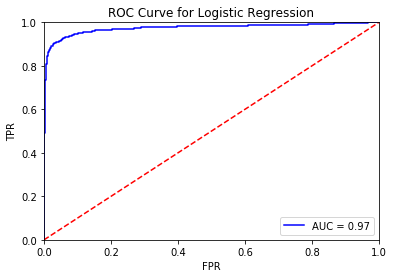

In [70]:
# Importing metrics to plot the ROC_AUC curve 
import sklearn.metrics as metrics

# Calculating the ROC_Curve for the Logistic Regression 

# Calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y5_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Creating the ROC_CURVE for Logistic Regression 
import matplotlib.pyplot as plt
# Plotting the ROC_AUC curve 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

# Plotting the worse case line, dotted line, that is where the outcome is decided randomly 
plt.plot([0, 1], [0, 1],'r--')

# Setting aesthetics of the plot 
plt.legend(loc = 'lower right')
plt.title('ROC Curve for Logistic Regression')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

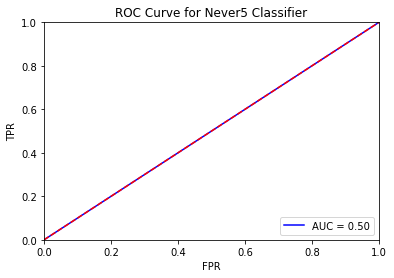

In [76]:
# Plotting the ROC_AUC Curve for Never5 Classifier 

# calculate the fpr and tpr for all thresholds of the classification, using the y5_Test and y_never_5_pred
fpr, tpr, threshold = metrics.roc_curve(y5_test, y_never_5_pred)
roc_auc = metrics.auc(fpr, tpr)

# Creating the ROC_CURVE for Never5 Classifier 
import matplotlib.pyplot as plt
plt.title('ROC Curve for Never5 Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

# Plotting the worst case 
plt.plot([0, 1], [0, 1],'r--')

# Setting aesthetics of the plot 
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

### Now find the roc_auc_score for each. 

In [71]:
# Importing the ROC_AUC_Score from sklearn metrics.
from sklearn.metrics import roc_auc_score

# Calculating the ROC_AUC_Score for the Logistic regression model
print(f"ROC_AUC_Score Logistic Regression:{roc_auc_score(y5_test, y5_pred)}")

# Calculating the ROC_AUC_Score for the Never 5 classifier model
print(f"ROC_AUC_Score Never 5 Classifier: {roc_auc_score(y5_test, y_never_5_pred)}")

ROC_AUC_Score Logistic Regression:0.9142204359839378
ROC_AUC_Score Never 5 Classifier: 0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

https://medium.com/greyatom/lets-learn-about-auc-roc-curve-4a94b4d88152

This metric, as can be seen in the link below, measures the total area under the curve. In the Logistic regression the AUC Score is 0.9. That means that this model does a quite good job of distinguishing the positive and negative values. Therefore, the AUC score is 0.91422 as the area under the ROC curve is large.


On the other hand, the second metric tells us that the the model is performing poorly and it is predictions are almost random, as it happens in this never5_classifier, since it is predicting always 0. 

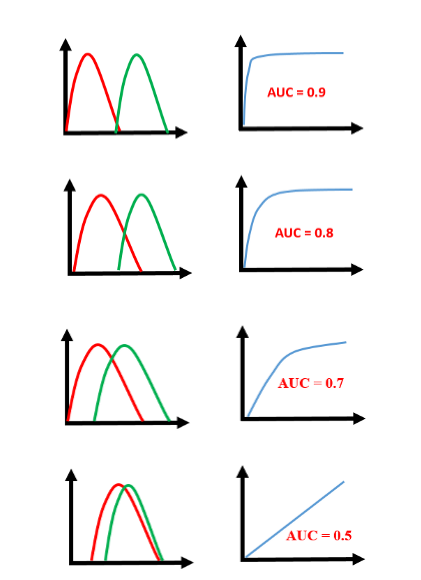